In [102]:
#Statement: Analysing the profitability of options on cars.

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
#Importing libraries for plot
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
# Import label encoder
from sklearn import preprocessing
#Libraries for validating
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Load the datasets

In [3]:
#Load the basedata
base=pd.read_csv('base_data.csv')
#load options data
options=pd.read_csv('options_data.csv')
#load vehicle line mapping data
vehicle=pd.read_csv('vehicle_line_mapping.csv')

In [4]:
#Renaming base data column
options=options.rename(columns={"Option_Code": "Options_Code"})

### Size of data

In [5]:
base.shape,options.shape,vehicle.shape

((1762650, 6), (766, 4), (22, 4))

In [112]:
base.head()

,VIN,Option_Quantities,Options_Code,Option_Desc,Model_Text,Sales_Price
0,SAL423322000009,1,B55C,Performance Seat (driver) - B55C,X152,1342.0
1,SAL423322000100,1,088GA,Anigre - 088GA,L320 Range Rover Sport,400.0
2,SAL423322000034,1,B55C,Performance Seat (driver) - B55C,X152,1342.0
3,SAL423322000108,1,B69B,Tailgate/Bootlid-Powered - B69B,X152,328.0
4,SAL423322000001,1,901,Auckland Blue - 901,L320 Range Rover Sport,485.0


In [111]:
# Group by model text
base.groupby(by=['Model_Text'], sort=True).sum()

,Option_Quantities,Sales_Price
Model_Text,,
Freelander /LR2,60,41075.0
L319 Discovery/LR4,41546,16768548.0
L320 Range Rover Sport,128,62546.0
L322 Range Rover,126,75673.0
L405 Range Rover,249904,211311806.0
L462,65447,34516514.0
L494 Range Rover Sport,336270,238470499.0
L538 Range Rover Evoque,151762,85516081.0
L550 Discovery Sport,227638,109809028.0


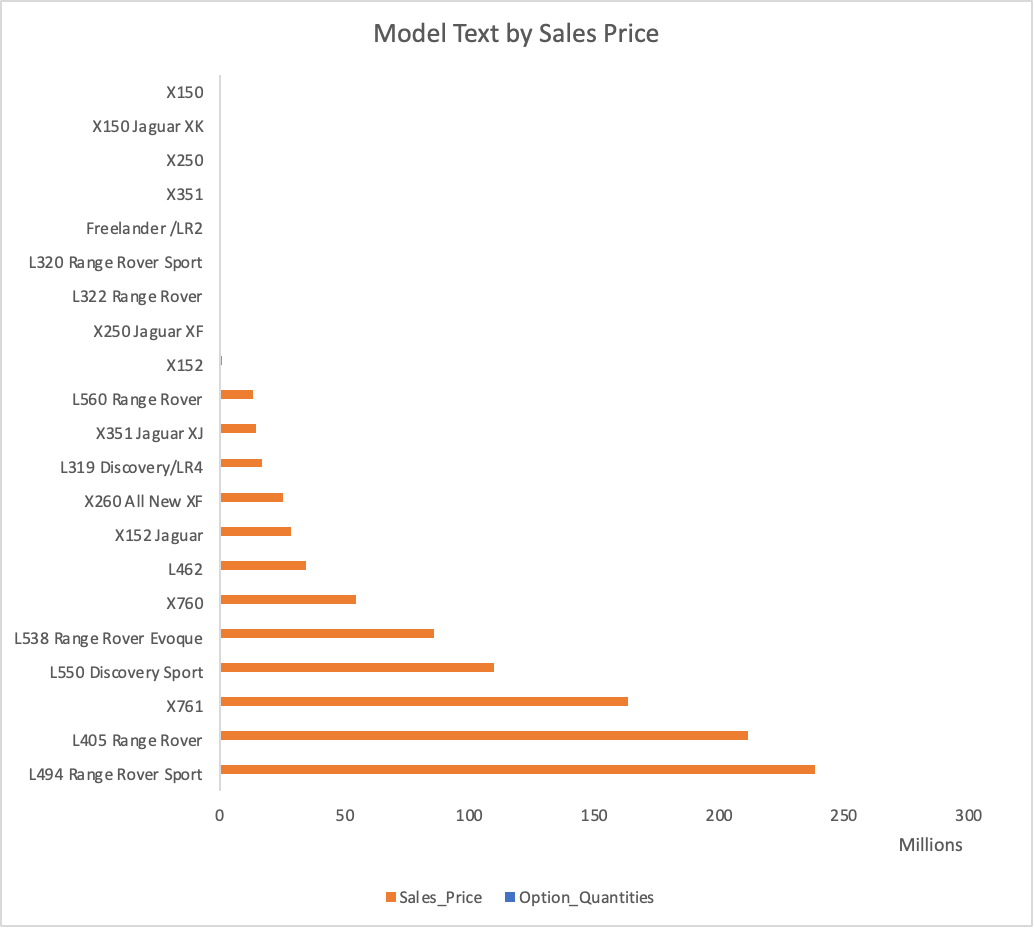

**Report**: L494 has the highest sales price and highest Option_Quantities, wherreas X150 has low

### If sales price is Zero or negative then cost should be zero

In [7]:
base.Sales_Price = np.where(base.Sales_Price < 0, 0,base.Sales_Price )


In [8]:
#To confirm any values less than zeros
base[base['Sales_Price']<0]

,VIN,Option_Quantities,Options_Code,Option_Desc,Model_Text,Sales_Price


### Merge the data based on Option_Code

In [10]:
#Merging base data with options data
data = pd.merge(base, options, on="Options_Code",how='outer',suffixes=('_base','_OptionData'))


In [11]:
#Removing the null values from the data
data= data[data.VIN.notnull()]


In [12]:
#fill the values with mean
data['Material_Cost']=data['Material_Cost'].fillna(data['Material_Cost'].mean())

In [13]:
data['Material_Cost'].isnull().sum()

0

### Check the datatypes

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111443 entries, 0 to 3111494
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   VIN                     object 
 1   Option_Quantities       float64
 2   Options_Code            object 
 3   Option_Desc_base        object 
 4   Model_Text              object 
 5   Sales_Price             float64
 6   Model                   object 
 7   Option_Desc_OptionData  object 
 8   Material_Cost           float64
dtypes: float64(3), object(6)
memory usage: 237.4+ MB


### Calculating the profit based on Sales_Price and Material_cost

In [15]:
# Derive a new column from existing column
data['Profit'] = data['Sales_Price'] - data['Material_Cost']


In [16]:
df = data[pd.notnull(data['Profit'])]

In [17]:
df['Profit'].isnull().sum()

0

In [122]:
df.head(4)

,VIN,Option_Quantities,Options_Code,Option_Desc_base,Model_Text,Sales_Price,Model,Option_Desc_OptionData,Material_Cost,Profit
0,SAL423322000009,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61
1,SAL423322000034,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61
2,SAL423322000084,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61
3,SAL423322000007,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61


### EDA and Feature Engineer

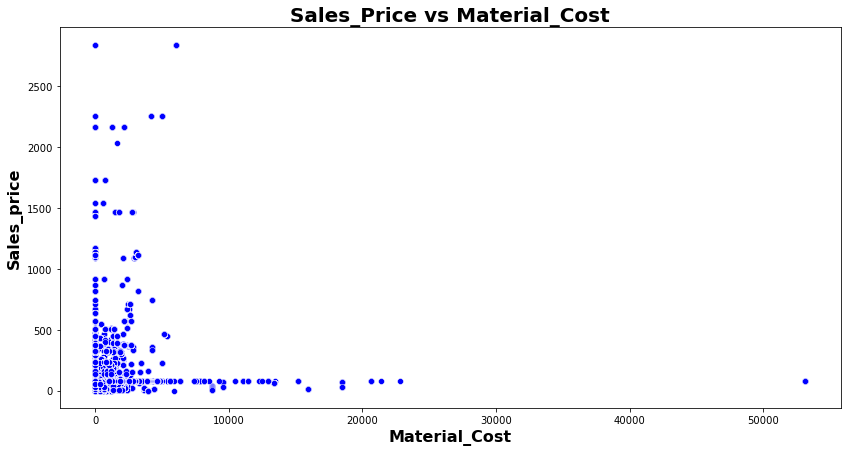

In [128]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="Sales_Price", y='Material_Cost', data=df,ec = "white",color='b')
plt.title("Sales_Price vs Material_Cost", weight="bold",fontsize=20)
plt.ylabel("Sales_price", weight="bold", fontsize=16)
plt.xlabel("Material_Cost", weight="bold", fontsize=16)
plt.show()

In [18]:
#describing the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Option_Quantities,3111435.0,0.977927,0.208946,-1.00,1.00,1.000000,1.000000,1.000000
Sales_Price,3111435.0,485.136720,805.760162,0.00,0.00,172.000000,629.000000,53155.000000
Material_Cost,3111435.0,75.044555,110.660309,0.00,12.07,71.830000,75.044679,2844.650000
Profit,3111435.0,410.092165,781.905121,-2844.65,-35.68,92.955321,564.030000,53079.955321


In [123]:
df.head(2)

,VIN,Option_Quantities,Options_Code,Option_Desc_base,Model_Text,Sales_Price,Model,Option_Desc_OptionData,Material_Cost,Profit
0,SAL423322000009,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61
1,SAL423322000034,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61


In [19]:
#describing the categorical data
df.describe(include = ['O']).T

,count,unique,top,freq
VIN,3111435,158104,SAL423322111166,242
Options_Code,3111435,1209,1AA,281554
Option_Desc_base,2915941,1100,1AA White - 1AA,281554
Model_Text,3111426,21,X761,680507
Model,2109739,7,L494,425245
Option_Desc_OptionData,2109168,362,Fuji White,241332


In [20]:
#Sales Loss
loss=df[df['Option_Quantities']==-1]

In [21]:
#Loss by model_text
loss.groupby(by=['Model_Text'], sort=False).sum()

,Option_Quantities,Sales_Price,Material_Cost,Profit
Model_Text,,,,
X152 Jaguar,-962.0,0.0,74596.400711,-74596.400711
X152,-88.0,0.0,12727.514857,-12727.514857
X351 Jaguar XJ,-384.0,0.0,31947.570071,-31947.570071
X351,-5.0,0.0,428.334036,-428.334036
X260 All New XF,-1104.0,2062.0,79585.614211,-77523.614211
L538 Range Rover Evoque,-1426.0,0.0,75468.967385,-75468.967385
X761,-13281.0,127038.0,929779.910932,-802741.910932
L462,-688.0,0.0,52669.970532,-52669.970532
X760,-3951.0,27060.0,267013.785275,-239953.785275


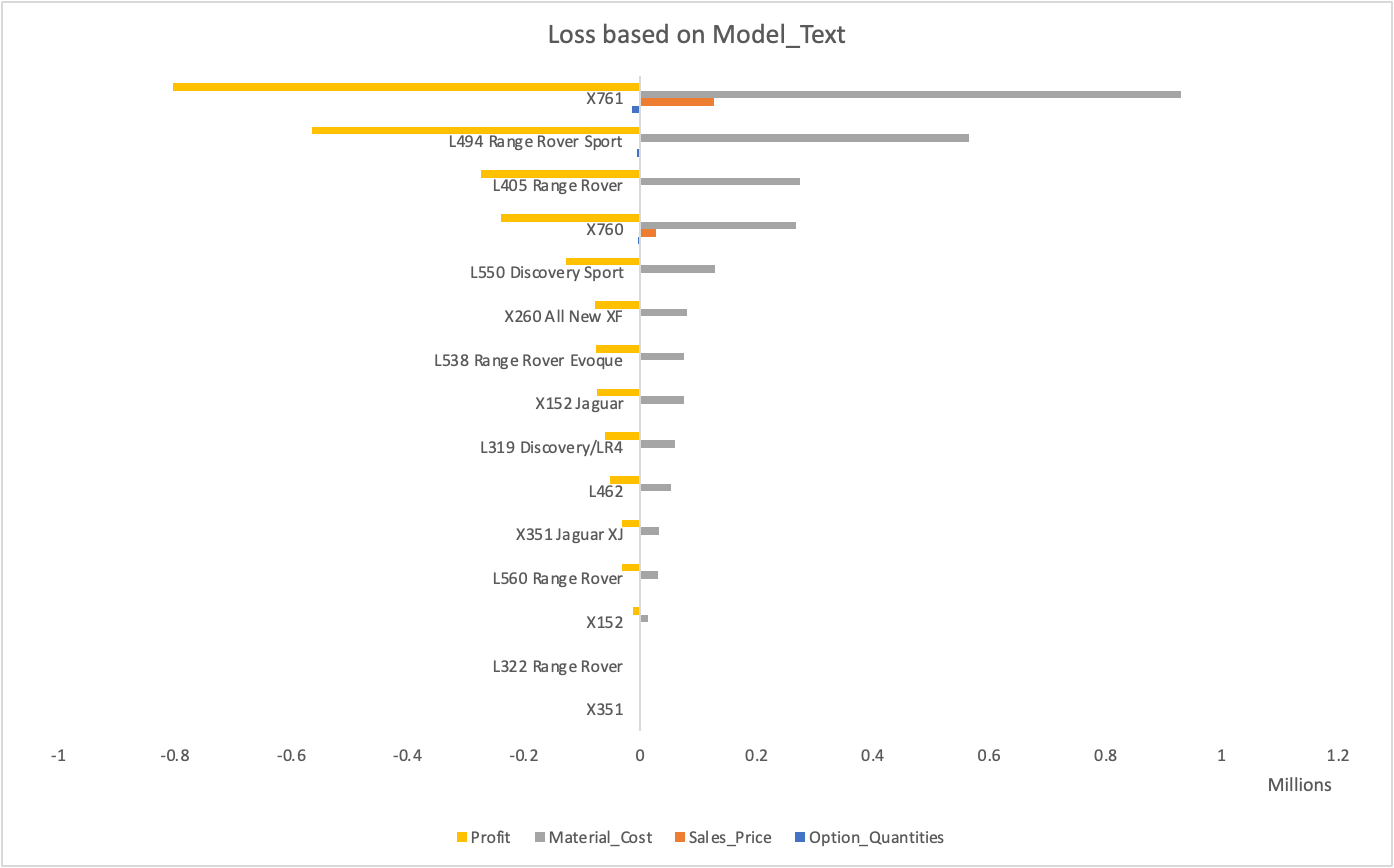

**Report**

1)Model X761 has highest material cost and loss

2)Whereas X351 has Lowest material cost and loss

In [22]:
# Remove sorting on grouped results
loss.groupby(by=['Model'], sort=False).sum()


,Option_Quantities,Sales_Price,Material_Cost,Profit
Model,,,,
X152,-2146.0,0.0,81649.82,-81649.82
X260,-4345.0,0.0,205694.23,-205694.23
X761,-4782.0,0.0,514919.80,-514919.80
X760,-4090.0,0.0,184172.42,-184172.42
X351,-1957.0,0.0,61530.84,-61530.84
L494,-3726.0,0.0,387899.11,-387899.11
L405,-3315.0,0.0,400628.20,-400628.20


**Report:**


Model X761 has highest material cost and loss,Whereas x351 has Lowest material cost and loss

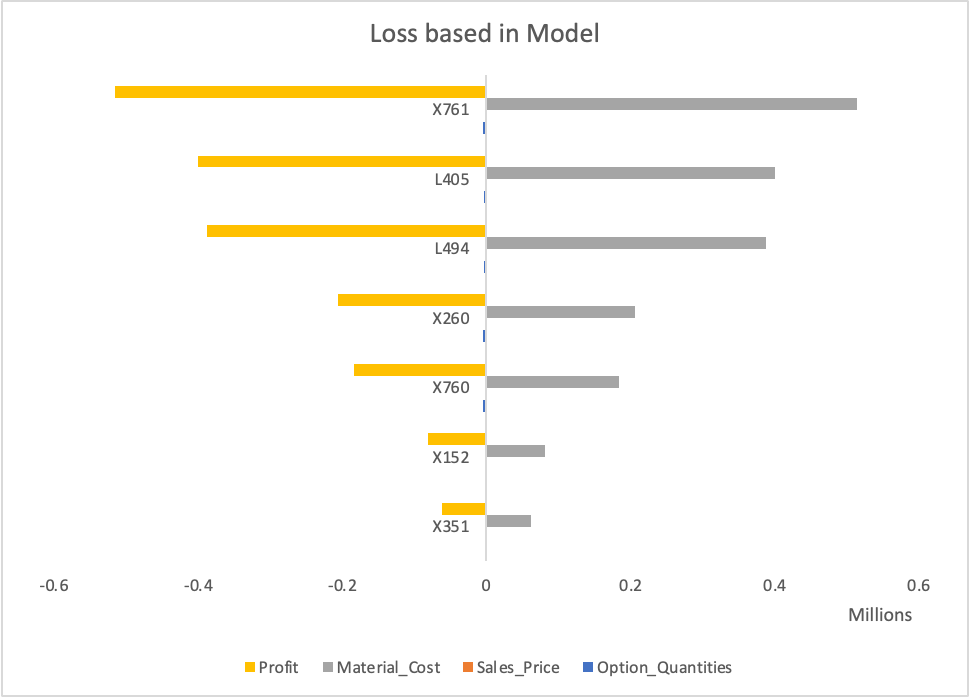

### Percentage of Null Values

In [23]:
datanull=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in datanull:
    print(feature, np.round(df[feature].isnull().mean(), 4),'Percent missing values')

Option_Desc_base 0.0628 Percent missing values
Model_Text 0.0 Percent missing values
Model 0.3219 Percent missing values
Option_Desc_OptionData 0.3221 Percent missing values


### Numeric Features

In [24]:
#Numerical features
numeric= [feature for feature in df.columns if df[feature].dtypes != 'O']
print('No of numerical variables: ', len(numeric))
df[numeric].head()

No of numerical variables:  4


,Option_Quantities,Sales_Price,Material_Cost,Profit
0,1.0,1342.0,258.39,1083.61
1,1.0,1342.0,258.39,1083.61
2,1.0,1342.0,258.39,1083.61
3,1.0,1342.0,258.39,1083.61
4,1.0,1342.0,258.39,1083.61


In [25]:
#discrete data
discrete=[feature for feature in numeric if len(df[feature].unique())<15]
print("Discrete Variables:",len(discrete))

Discrete Variables: 1


In [27]:
discrete

['Option_Quantities']

In [26]:
#Continous Data
continuous=[feature for feature in numeric if feature not in discrete]
print("Continuous feature Count {}".format(len(continuous)))

Continuous feature Count 3


In [27]:
continuous

['Sales_Price', 'Material_Cost', 'Profit']

### Univariant Analysis

In [29]:
dataset=df.copy()

/Users/rahulpandiri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/rahulpandiri/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


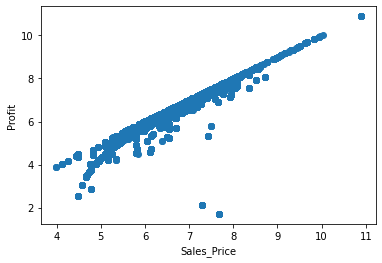

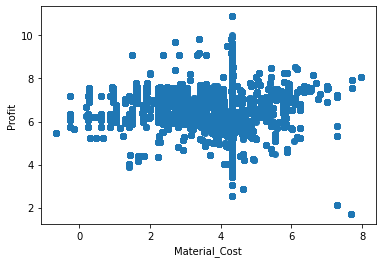

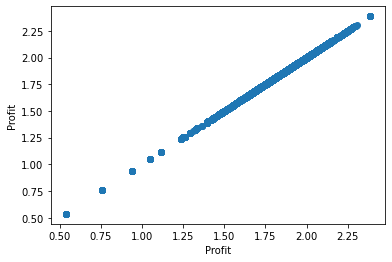

In [31]:
for feature in continuous:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['Profit']=np.log(data['Profit'])
    plt.scatter(data[feature],data['Profit'])
    plt.xlabel(feature)
    plt.ylabel('Profit')
    #plt.title(feature)
    plt.show()


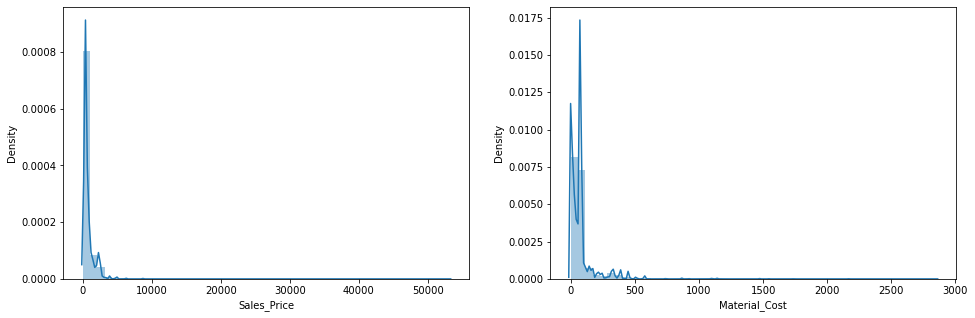

In [32]:
#Sales_Price and Material Cost Plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Sales_Price'])
plt.subplot(1,2,2)
sns.distplot(df['Material_Cost'])
plt.show()

In [33]:
df2=dataset.copy()

### Checking the outliers

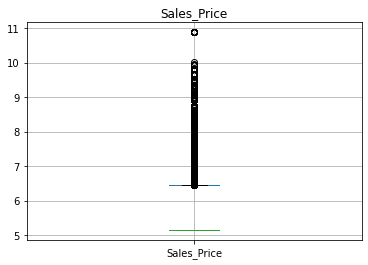

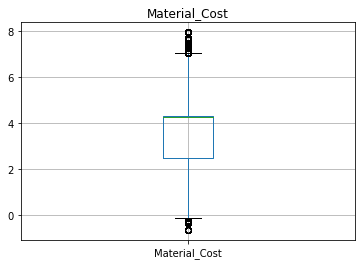

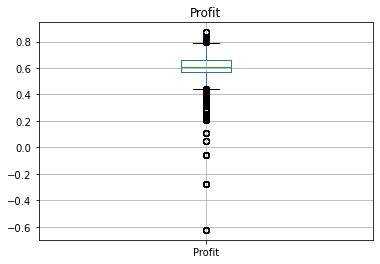

In [38]:
for feature in continuous:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        #plt.ylabel(feature)
        plt.title(feature)
        plt.show()

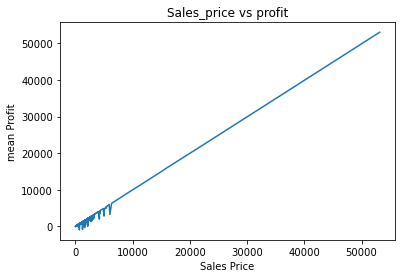

In [39]:
dataset.groupby('Sales_Price')['Profit'].mean().plot()
plt.xlabel('Sales Price')
plt.ylabel('mean Profit')
plt.title("Sales_price vs profit")
plt.show()

### Checking categorical features

In [40]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['VIN',
 'Options_Code',
 'Option_Desc_base',
 'Model_Text',
 'Model',
 'Option_Desc_OptionData']

In [41]:
for feature in categorical_features:
    print('The feature {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature VIN and number of categories are 158104
The feature Options_Code and number of categories are 1209
The feature Option_Desc_base and number of categories are 1101
The feature Model_Text and number of categories are 22
The feature Model and number of categories are 8
The feature Option_Desc_OptionData and number of categories are 363


### One hot Encoding for categorical data

In [43]:
data1 = pd.get_dummies(df, columns = ['Model_Text', 'Model'])


In [44]:
data1

,VIN,Option_Quantities,Options_Code,Option_Desc_base,Sales_Price,Option_Desc_OptionData,Material_Cost,Profit,Model_Text_Freelander /LR2,Model_Text_L319 Discovery/LR4,...,Model_Text_X351 Jaguar XJ,Model_Text_X760,Model_Text_X761,Model_L405,Model_L494,Model_X152,Model_X260,Model_X351,Model_X760,Model_X761
0,SAL423322000009,1.0,B55C,Performance Seat (driver) - B55C,1342.0,Performance seats,258.39,1083.61,0,0,...,0,0,0,0,0,1,0,0,0,0
1,SAL423322000034,1.0,B55C,Performance Seat (driver) - B55C,1342.0,Performance seats,258.39,1083.61,0,0,...,0,0,0,0,0,1,0,0,0,0
2,SAL423322000084,1.0,B55C,Performance Seat (driver) - B55C,1342.0,Performance seats,258.39,1083.61,0,0,...,0,0,0,0,0,1,0,0,0,0
3,SAL423322000007,1.0,B55C,Performance Seat (driver) - B55C,1342.0,Performance seats,258.39,1083.61,0,0,...,0,0,0,0,0,1,0,0,0,0
4,SAL423322000064,1.0,B55C,Performance Seat (driver) - B55C,1342.0,Performance seats,258.39,1083.61,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111490,SAL423322134348,1.0,088HS,Grand Black Veneer w/Red - 088HS,382.0,Grand Black veneer,53.94,328.06,0,0,...,0,0,0,0,1,0,0,0,0,0
3111491,SAL423322134488,1.0,088HS,Grand Black Veneer w/Red - 088HS,382.0,Grand Black veneer,53.94,328.06,0,0,...,0,0,0,0,1,0,0,0,0,0
3111492,SAL423322139531,1.0,088HS,Grand Black Veneer w/Red - 088HS,382.0,Grand Black veneer,53.94,328.06,0,0,...,0,0,0,0,1,0,0,0,0,0
3111493,SAL423322136505,1.0,088HS,Grand Black Veneer w/Red - 088HS,382.0,Grand Black veneer,53.94,328.06,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels on column Option_Desc_OptionData.
data1['Option_Desc_OptionData']= label_encoder.fit_transform(data1['Option_Desc_OptionData'])

### Multivariant Analysis

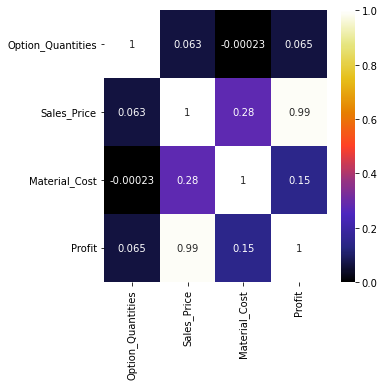

In [47]:
#Plot correlation data
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report:** Sales_price and profit are highly correalted, Option_Quantities and Material cost are negatively correlated

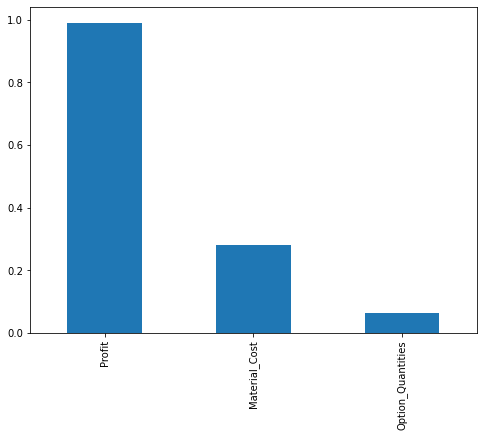

In [48]:
totalcount = df.corr()["Sales_Price"].sort_values(ascending=False)
plt.figure(figsize=(8,6))
totalcount.drop("Sales_Price").plot.bar()
plt.show()


In [49]:
#Checking the null values 
data1.isnull().sum()

VIN                                        0
Option_Quantities                          0
Options_Code                               0
Option_Desc_base                      195494
Sales_Price                                0
Option_Desc_OptionData                     0
Material_Cost                              0
Profit                                     0
Model_Text_Freelander /LR2                 0
Model_Text_L319 Discovery/LR4              0
Model_Text_L320 Range Rover Sport          0
Model_Text_L322 Range Rover                0
Model_Text_L405 Range Rover                0
Model_Text_L462                            0
Model_Text_L494 Range Rover Sport          0
Model_Text_L538 Range Rover Evoque         0
Model_Text_L550 Discovery Sport            0
Model_Text_L560 Range Rover                0
Model_Text_X150                            0
Model_Text_X150 Jaguar XK                  0
Model_Text_X152                            0
Model_Text_X152 Jaguar                     0
Model_Text

In [50]:
#Check the data type
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111435 entries, 0 to 3111494
Data columns (total 36 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   VIN                                 object 
 1   Option_Quantities                   float64
 2   Options_Code                        object 
 3   Option_Desc_base                    object 
 4   Sales_Price                         float64
 5   Option_Desc_OptionData              int64  
 6   Material_Cost                       float64
 7   Profit                              float64
 8   Model_Text_Freelander /LR2          uint8  
 9   Model_Text_L319 Discovery/LR4       uint8  
 10  Model_Text_L320 Range Rover Sport   uint8  
 11  Model_Text_L322 Range Rover         uint8  
 12  Model_Text_L405 Range Rover         uint8  
 13  Model_Text_L462                     uint8  
 14  Model_Text_L494 Range Rover Sport   uint8  
 15  Model_Text_L538 Range Rover Evoque  uint8  
 16  

In [52]:
final=data1.copy()

In [53]:
final.head(2)

,VIN,Option_Quantities,Options_Code,Option_Desc_base,Sales_Price,Option_Desc_OptionData,Material_Cost,Profit,Model_Text_Freelander /LR2,Model_Text_L319 Discovery/LR4,...,Model_Text_X351 Jaguar XJ,Model_Text_X760,Model_Text_X761,Model_L405,Model_L494,Model_X152,Model_X260,Model_X351,Model_X760,Model_X761
0,SAL423322000009,1.0,B55C,Performance Seat (driver) - B55C,1342.0,282,258.39,1083.61,0,0,...,0,0,0,0,0,1,0,0,0,0
1,SAL423322000034,1.0,B55C,Performance Seat (driver) - B55C,1342.0,282,258.39,1083.61,0,0,...,0,0,0,0,0,1,0,0,0,0


### Removing Outliers through IQR

In [54]:
# IQR
Q1 = np.percentile(final['Sales_Price'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(final['Sales_Price'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

In [55]:
upper = Q3 +1.5*IQR

lower = Q1- 1.5*IQR

In [56]:
final.shape

(3111435, 36)

In [57]:
q_low = final['Sales_Price'].quantile(0.20)
q_hi  = final['Sales_Price'].quantile(0.80)

car1= final[(final['Sales_Price']< q_hi) & (final['Sales_Price']> q_low)]

In [58]:
car=car1.copy()

In [59]:
car.shape

(1060089, 36)

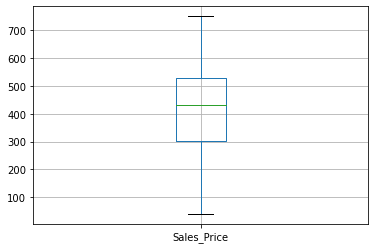

In [60]:
#Checking sales price after removing the outliers
car.boxplot(column='Sales_Price')
plt.show()

In [148]:
#X=car.drop(['Sales_Price'],axis=1)

In [64]:
car1.head(2)

,VIN,Option_Quantities,Options_Code,Option_Desc_base,Sales_Price,Option_Desc_OptionData,Material_Cost,Profit,Model_Text_Freelander /LR2,Model_Text_L319 Discovery/LR4,...,Model_Text_X351 Jaguar XJ,Model_Text_X760,Model_Text_X761,Model_L405,Model_L494,Model_X152,Model_X260,Model_X351,Model_X760,Model_X761
980,SAL423322000100,1.0,088GA,Anigre - 088GA,400.0,362,75.044679,324.955321,0,0,...,0,0,0,0,0,0,0,0,0,0
983,SAL423322000105,1.0,088GA,Anigre - 088GA,400.0,362,75.044679,324.955321,0,0,...,0,0,0,0,0,0,0,0,0,0


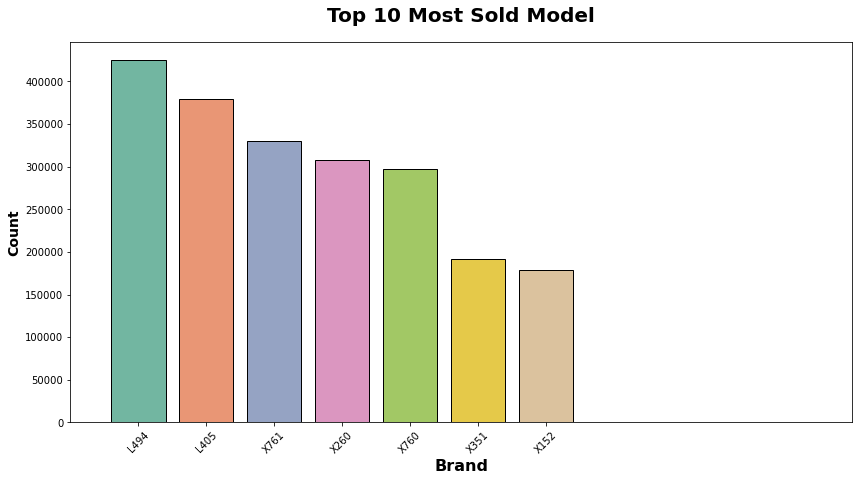

In [65]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Model", data=df,ec = "black",palette="Set2",order = df['Model'].value_counts().index)
plt.title("Top 10 Most Sold Model", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Model", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**Report:**


Model L94 was highest sold continued by L405,X761

In [66]:
brand = df.groupby('Model').Sales_Price.max()
brand_df = brand.to_frame().sort_values('Sales_Price',ascending=False)[0:10]
brand_df

,Sales_Price
Model,
L405,18447.0
L494,18447.0
X152,8769.0
X351,8769.0
X761,8769.0
X260,2466.0
X760,1987.0


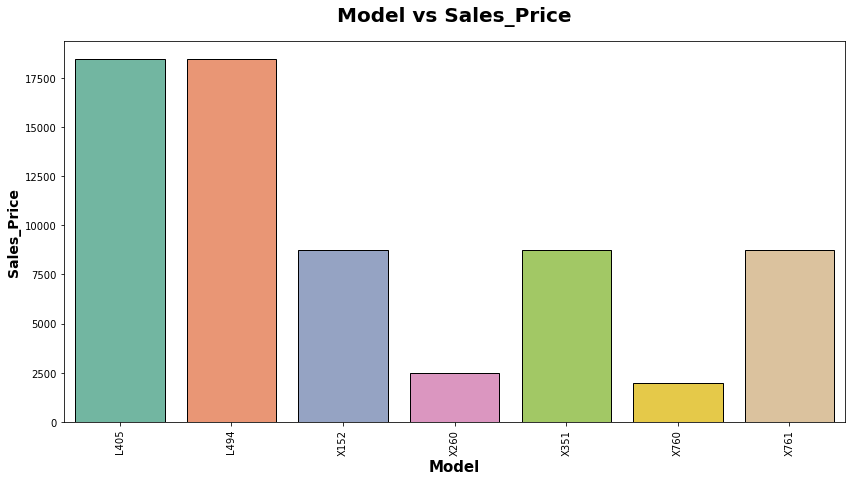

In [105]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.values,ec = "black",palette="Set2")
plt.title("Model vs Sales_Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Sales_Price", weight="bold", fontsize=14)
plt.xlabel("Model", weight="bold", fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Report**

Model L405 and L994 has highest sales Price,whereas X260 has least

In [68]:
brand1 = df.groupby('Model').Profit.max()
mostprofit = brand1.to_frame().sort_values('Profit',ascending=False)[0:10]
mostprofit

,Profit
Model,
L494,18417.46
L405,18374.25
X152,8764.55
X351,8758.20
X761,8741.07
X260,2098.33
X760,1982.05


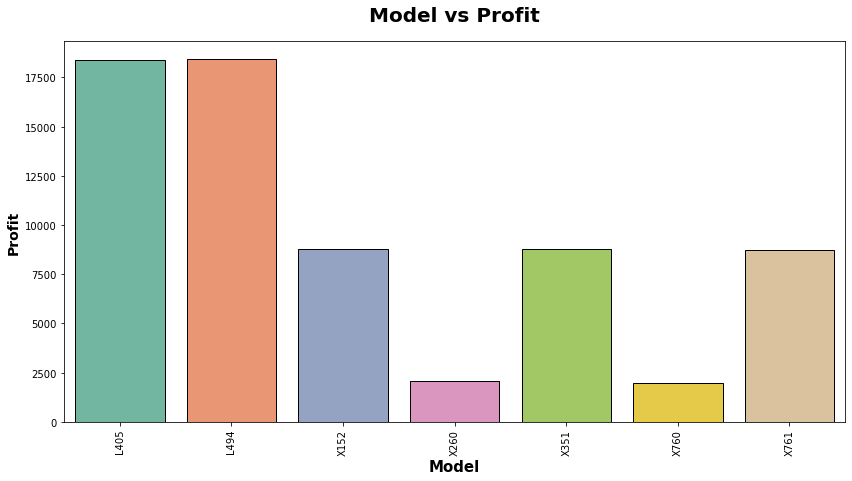

In [106]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand1.index, y=brand1.values,ec = "black",palette="Set2")
plt.title("Model vs Profit", weight="bold",fontsize=20, pad=20)
plt.ylabel("Profit", weight="bold", fontsize=14)
plt.xlabel("Model", weight="bold", fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Report:**  L405,L994 has highest profit 

In [69]:
df.head(2)

,VIN,Option_Quantities,Options_Code,Option_Desc_base,Model_Text,Sales_Price,Model,Option_Desc_OptionData,Material_Cost,Profit
0,SAL423322000009,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61
1,SAL423322000034,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61


In [73]:
#Costliest car
car2= df.groupby('Options_Code').Sales_Price.max()
car3 =car2.to_frame().sort_values('Sales_Price',ascending=False)[0:10]
car3

,Sales_Price
Options_Code,
005CA,53155.0
SVP,22776.0
SVP04,21412.0
032EV,20639.0
503SV,18447.0
519SV,15910.0
Z73R,15213.0
SVP03,13421.0
005CQ,13380.0


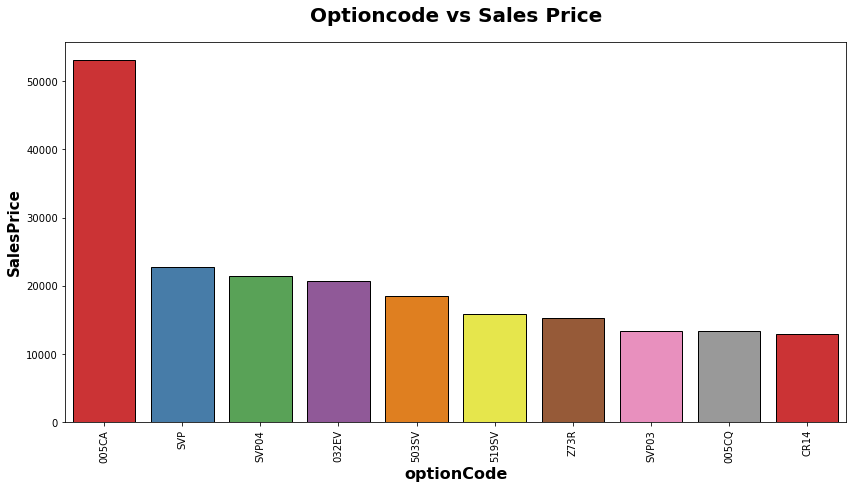

In [75]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car3.index, y=car3.Sales_Price,ec = "black",palette="Set1")
plt.title("Optioncode vs Sales Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("SalesPrice", weight="bold", fontsize=15)
plt.xlabel("optionCode", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


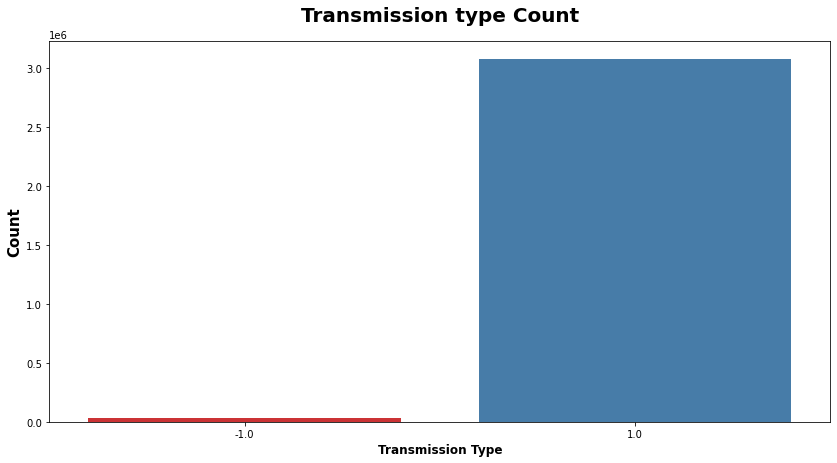

In [76]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Option_Quantities', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

In [77]:
df.head(2)

,VIN,Option_Quantities,Options_Code,Option_Desc_base,Model_Text,Sales_Price,Model,Option_Desc_OptionData,Material_Cost,Profit
0,SAL423322000009,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61
1,SAL423322000034,1.0,B55C,Performance Seat (driver) - B55C,X152,1342.0,X152,Performance seats,258.39,1083.61


In [79]:
car1.shape

(1060089, 36)

In [80]:
X=car1.drop(['Profit','VIN','Options_Code','Option_Desc_base','Sales_Price'], axis=1)

In [81]:
y=car1['Profit']

### Validating the model

In [82]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [83]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [88]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [86]:
##prediction 
pred=regression.predict(X_test)

In [87]:
from sklearn.metrics import r2_score
score=r2_score(pred,y_test)

In [97]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
# fit with X_train and y_train data
regressor.fit(X_train,y_train) 

RandomForestRegressor(random_state=0)

In [98]:
y_predict = regressor.predict(X_test)

In [99]:
from sklearn.ensemble import ExtraTreesRegressor
print(regressor.feature_importances_)

[7.60190739e-05 2.23280069e-01 5.58564651e-01 2.04525211e-05
 9.00059137e-03 1.44915206e-05 2.17311287e-05 2.05833520e-02
 5.22072916e-03 1.35040030e-02 2.62330314e-02 1.42066379e-02
 3.05770558e-03 0.00000000e+00 0.00000000e+00 6.08282355e-04
 1.38453582e-02 9.76501912e-06 3.97368013e-05 9.86730300e-03
 0.00000000e+00 1.13324146e-03 3.75132536e-02 4.22499142e-02
 4.53560139e-04 1.21483452e-03 5.55299177e-04 1.74134957e-04
 1.68045968e-02 1.28340220e-04 1.61891493e-03]


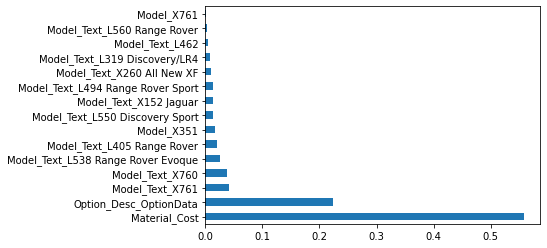

In [101]:
top15=pd.Series(regressor.feature_importances_,index=X.columns)
top15.nlargest(15).plot(kind='barh')
plt.show()

**Report:**

Material_cost, Option_desc are the important features for predicting the data followed by Model_X761 and X760

### Export data

In [107]:
#X_train.to_csv('desktop/train.csv')
#X_test.to_csv('desktop/test.csv')

In [87]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
#i = 47
#shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[47], feature_names=X_train.columns)

In [ ]:
#nameplate for x360 and x100 (jagur) are missing